# Fashion MNIST — CNN Image Classification (Keras)
This notebook covers:
1) Loading the Fashion MNIST dataset from `tf.keras.datasets`
2) Preprocessing for training
3) Building and evaluating a CNN

**Important:** We will **not** one-hot encode labels. We will use `sparse_categorical_crossentropy`.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

TensorFlow: 2.19.0


In [2]:
# Load Fashion MNIST data
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

print("x_train:", x_train.shape, x_train.dtype)
print("y_train:", y_train.shape, y_train.dtype)
print("x_test :", x_test.shape, x_test.dtype)
print("y_test :", y_test.shape, y_test.dtype)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train: (60000, 28, 28) uint8
y_train: (60000,) uint8
x_test : (10000, 28, 28) uint8
y_test : (10000,) uint8


In [3]:
# Number of unique classes
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)


Number of classes: 10


In [4]:
# Define class names
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

print(class_names)


['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


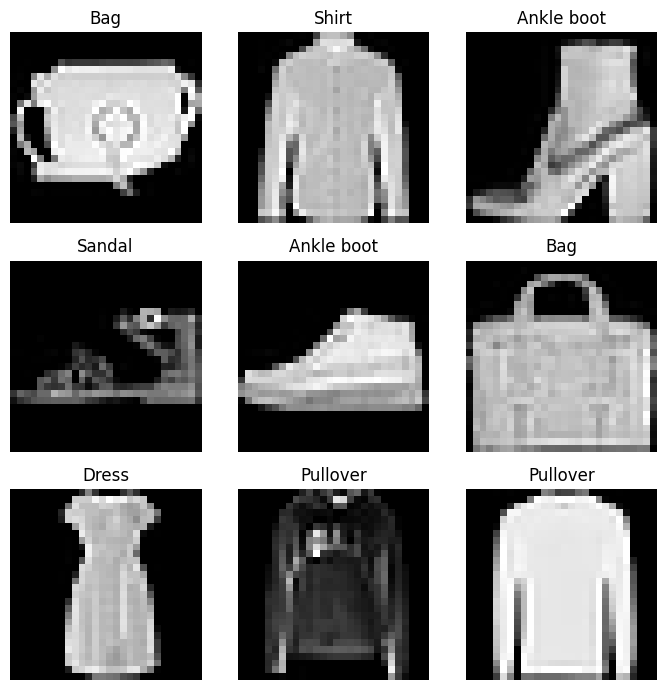

In [5]:
# Plot a 3x3 grid of random images from the dataset with their labels
rng = np.random.default_rng(42)
idxs = rng.choice(len(x_train), size=9, replace=False)

plt.figure(figsize=(7, 7))
for i, idx in enumerate(idxs, start=1):
    plt.subplot(3, 3, i)
    plt.imshow(x_train[idx], cmap="gray")
    plt.title(class_names[y_train[idx]])
    plt.axis("off")
plt.tight_layout()
plt.show()


In [6]:
# Count occurrences of each class in the training set
class_counts = np.bincount(y_train, minlength=num_classes)
for i, c in enumerate(class_counts):
    print(f"{i:>2} | {class_names[i]:<12} | {c}")


 0 | T-shirt/top  | 6000
 1 | Trouser      | 6000
 2 | Pullover     | 6000
 3 | Dress        | 6000
 4 | Coat         | 6000
 5 | Sandal       | 6000
 6 | Shirt        | 6000
 7 | Sneaker      | 6000
 8 | Bag          | 6000
 9 | Ankle boot   | 6000


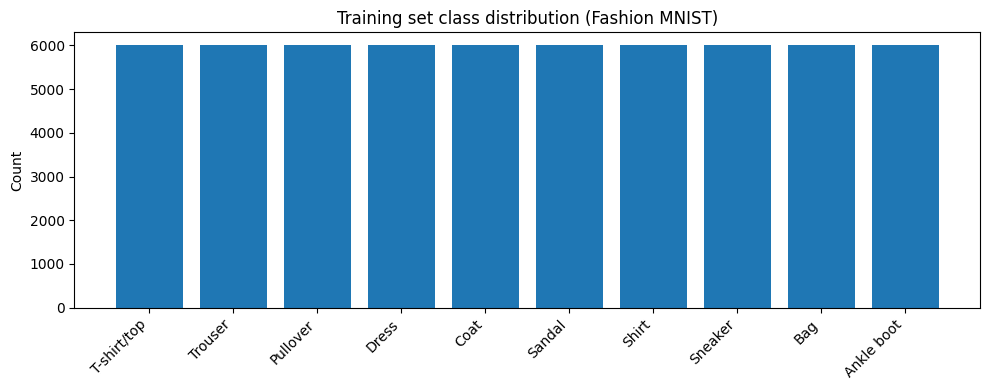

In [7]:
# Plot the class distribution
plt.figure(figsize=(10, 4))
plt.bar(class_names, class_counts)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Count")
plt.title("Training set class distribution (Fashion MNIST)")
plt.tight_layout()
plt.show()


In [8]:
# Normalize pixel values for x_train and x_test (0..255 -> 0..1)
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

x_train = np.expand_dims(x_train, axis=-1)
x_test  = np.expand_dims(x_test, axis=-1)

print("x_train:", x_train.shape, x_train.dtype)
print("x_test :", x_test.shape, x_test.dtype)

# One-hot encode the labels
print("y_train unique:", np.unique(y_train))


x_train: (60000, 28, 28, 1) float32
x_test : (10000, 28, 28, 1) float32
y_train unique: [0 1 2 3 4 5 6 7 8 9]


In [9]:
# Build a CNN model (you can tweak this architecture)
model = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),

    layers.Conv2D(32, (3, 3), padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(num_classes, activation="softmax"),
])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,442 (947.04 KB)

 Trainable params: 241,994 (945.29 KB)

 Non-trainable params: 448 (1.75 KB)

In [10]:
# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [11]:
# Train the model
callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-5),
]

history = model.fit(x_train, y_train,validation_split=0.15,epochs=15,batch_size=128,callbacks=callbacks,verbose=1)


Epoch 1/15
399/399 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.6692 - loss: 1.0156 - val_accuracy: 0.4497 - val_loss: 1.9804 - learning_rate: 0.0010
Epoch 2/15
399/399 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8365 - loss: 0.4420 - val_accuracy: 0.8784 - val_loss: 0.3119 - learning_rate: 0.0010
Epoch 3/15
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8646 - loss: 0.3713 - val_accuracy: 0.8830 - val_loss: 0.2998 - learning_rate: 0.0010
Epoch 4/15
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8766 - loss: 0.3303 - val_accuracy: 0.8988 - val_loss: 0.2782 - learning_rate: 0.0010
Epoch 5/15
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8884 - loss: 0.3059 - val_accuracy: 0.9017 - val_loss: 0.2688 - learning_rate: 0.0010
Epoch 6/15
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8930 - loss: 0.2901 - val_accuracy: 0.9088 - val_loss: 0.2449 - learning_rate: 0.0010
Epoch 7/15
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8972 - loss: 0.2797

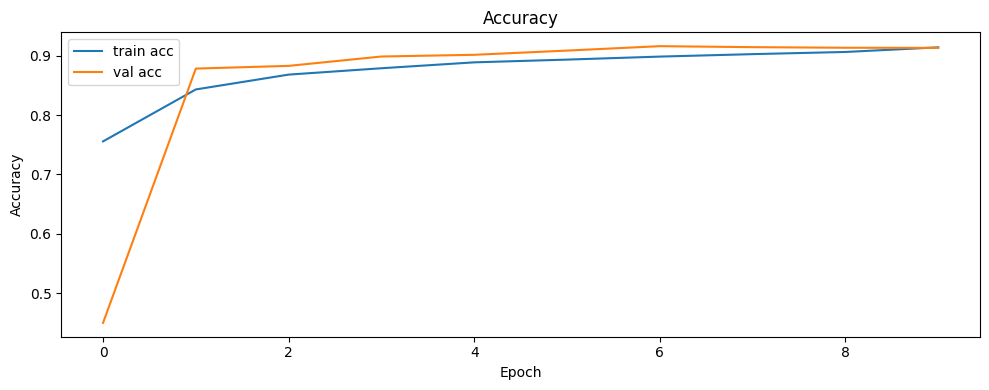

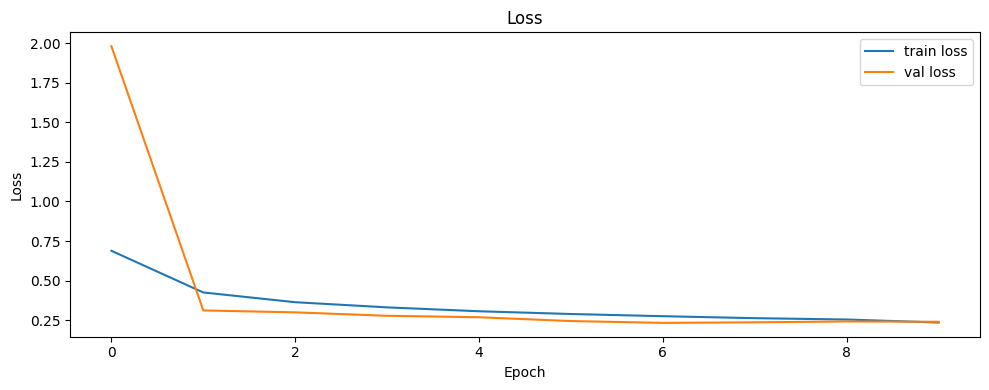

In [12]:
plt.figure(figsize=(10, 4))
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.show()


In [13]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")


Test loss: 0.2534
Test accuracy: 0.9104


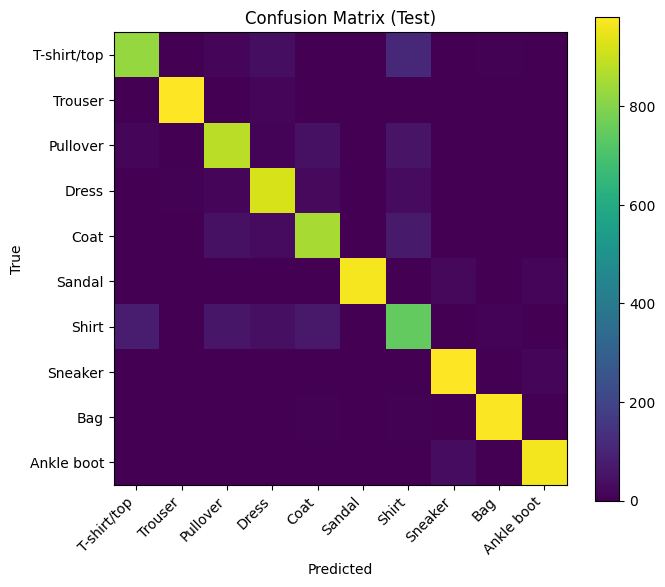

              precision    recall  f1-score   support

 T-shirt/top       0.90      0.83      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.87      0.88      0.87      1000
       Dress       0.88      0.92      0.90      1000
        Coat       0.85      0.85      0.85      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.74      0.75      0.74      1000
     Sneaker       0.95      0.98      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [18]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = np.argmax(model.predict(x_test, verbose=0), axis=1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 6))
plt.imshow(cm)
plt.title("Confusion Matrix (Test)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()
plt.xticks(range(num_classes), class_names, rotation=45, ha="right")
plt.yticks(range(num_classes), class_names)
plt.tight_layout()
plt.show()

print(classification_report(y_test, y_pred, target_names=class_names))


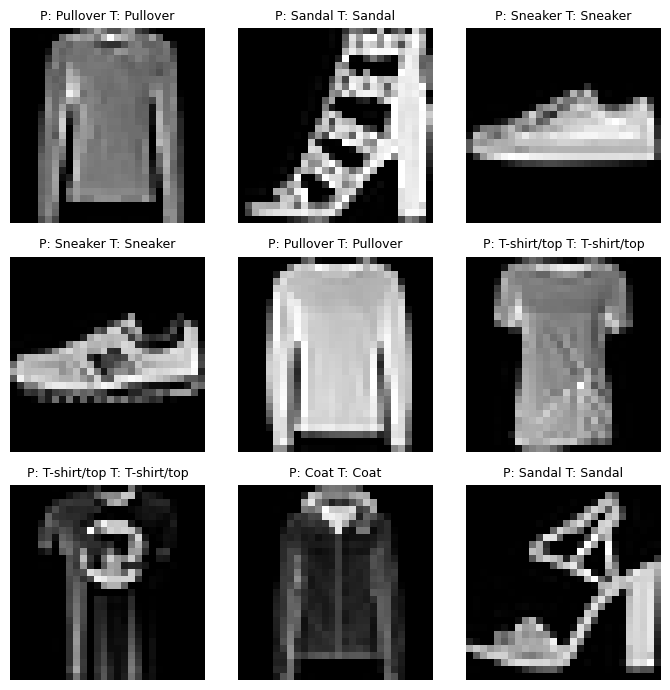

In [17]:
rng = np.random.default_rng(42)
idxs = rng.choice(len(x_test), size=9, replace=False)

plt.figure(figsize=(7, 7))
for i, idx in enumerate(idxs, start=1):
  plt.subplot(3, 3, i)
  plt.imshow(x_test[idx].squeeze(), cmap="gray")
  pred = class_names[y_pred[idx]]
  true = class_names[y_test[idx]]
  plt.title(f"P: {pred} T: {true}", fontsize=9)
  plt.axis("off")

plt.tight_layout()
plt.show()
